<div class="usecase-title">Melbourne Housing Market Transformations: Multi-Dimensional Analysis of Price Trends, Geographic Patterns, and Market Dynamics (2000-2016)</div>

<div class="usecase-authors"><b>Authored by: </b> Naga Nikhil Woopalanchi</div>

<div class="usecase-duration"><b>Duration:</b> {90} mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b>{Intermediate}</div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b>Python, Pandas </div>
</div>

<div class="usecase-section-header">Scenario</div>

Melbourne's housing market has experienced significant transformation between 2000 and 2016, creating challenges for policymakers, investors, and residents alike. Rising housing costs, geographic disparities in price growth, and changing neighborhood compositions have raised concerns about affordability, investment strategy, and urban development patterns. Despite extensive raw data on property transactions, there remains a lack of comprehensive analysis that integrates price trends, geographic variations, market transformation dynamics, supply-demand relationships, and transaction patterns into a coherent understanding of Melbourne's housing market evolution. This knowledge gap hampers evidence-based policy development for addressing housing affordability challenges, limits investors' ability to identify strategic opportunities, and impedes urban planners' efforts to manage neighborhood transformation effectively. This study aims to address this gap by conducting a multidimensional analysis of Melbourne's housing market data from 2000 to 2016, providing stakeholders with actionable insights into the complex dynamics shaping one of Australia's most significant property markets.

At the end of this use case you will learn:

- To analyse the evolution of median property prices across different property types in Melbourne from 2000 to 2016, identifying key trends and calculating compound annual growth rates.

- To identify and quantify geographic price disparities across Melbourne's neighborhoods, determining which areas command price premiums and how these premiums vary by property type.

<div class="usecase-section-header"><b>Comprehensive Analysis of Melbourne's Housing Market Trends and Urban Dynamics (2000–2016)</b></div>

The Melbourne Housing Market Analysis project investigates property price trends, urban development patterns, and market dynamics in Melbourne from 2000 to 2016. Through analysis of comprehensive housing transaction data across various property types and geographic areas, this study seeks to reveal critical insights into price growth rates, geographic disparities, market activity patterns, and supply-demand relationships. This research aims to serve multiple stakeholders: policymakers addressing housing affordability challenges, investors navigating market opportunities, and urban planners monitoring neighborhood transformation.

Our analytical framework incorporates five complementary dimensions to provide a holistic view of Melbourne's housing landscape. First, we conduct price trends analysis to track median property values over time, calculating growth rates and identifying key inflection points in the market. Second, we perform geographic price comparison to identify premium neighborhoods and quantify their relative price advantages. Third, we examine market transformation patterns by analysing shifts in housing composition and identifying potential gentrification indicators across different areas.

The final two dimensions of our analysis focus on market mechanics and activity patterns. Through supply-demand dynamics analysis, we calculate price elasticity relative to transaction volumes, identifying areas where prices exhibit atypical behavior due to supply constraints. Our market activity analysis tracks transaction patterns over time and their correlation with price movements, revealing hot and cold market periods. These combined analytical approaches illuminate Melbourne's evolving housing landscape, documenting the widening gap between house and apartment prices, pinpointing supply-constrained neighborhoods, and tracking dramatic shifts in affordability and market composition throughout the study period.



# Importing Required Libraries



In [ ]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from io import StringIO

# Importing the required dataset

## Import the House Prices by Small Area Sale Year Datatset

In [ ]:
# import the house prices by small area sale year datatset

base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
dataset_id = 'house-prices-by-small-area-sale-year'

url = f'{base_url}{dataset_id}/exports/csv'
params = {'select': '*', 'limit': -1, 'lang': 'en', 'timezone': 'UTC'}

response = requests.get(url, params=params)

if response.status_code == 200:
  url_content = response.content.decode('utf-8')
  small_area_df = pd.read_csv(StringIO(url_content), delimiter=';')  # renaming dataset
  print(small_area_df.head(10))
else:
  print(f'Request failed with status code {response.status_code}')

   sale_year                    small_area                   type  \
0       2000                     Docklands  Residential Apartment   
1       2000                     Parkville        House/Townhouse   
2       2000                     Southbank  Residential Apartment   
3       2001                       Carlton        House/Townhouse   
4       2001               Melbourne (CBD)        House/Townhouse   
5       2001               North Melbourne        House/Townhouse   
6       2001               North Melbourne  Residential Apartment   
7       2001                     Parkville        House/Townhouse   
8       2001                   South Yarra        House/Townhouse   
9       2001  West Melbourne (Residential)        House/Townhouse   

   median_price  transaction_count  
0      487300.0                556  
1      516000.0                 42  
2      370500.0                901  
3      381000.0                113  
4           NaN                  4  
5      325500.0   

In [ ]:
small_area_df.info() # structure of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sale_year          347 non-null    int64  
 1   small_area         340 non-null    object 
 2   type               347 non-null    object 
 3   median_price       319 non-null    float64
 4   transaction_count  347 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 13.7+ KB


## Median House Prices by Transfer Year from 2000 to 2016

In [19]:
base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
dataset_id = 'median-house-prices-by-transfer-year-from-2000-2016'

url = f'{base_url}{dataset_id}/exports/csv'
params = {'select': '*', 'limit': -1, 'lang': 'en', 'timezone': 'UTC'}

response = requests.get(url, params=params)

if response.status_code == 200:
  url_content = response.content.decode('utf-8')
  transfer_year_df  = pd.read_csv(StringIO(url_content), delimiter=';')  # renaming dataset
  print(transfer_year_df .head(10))
else:
  print(f'Request failed with status code {response.status_code}')

   transfer_year                   type  median_price  transaction_count
0           2001        House/Townhouse      321500.0                648
1           2001  Residential Apartment      274950.0               2510
2           2003        House/Townhouse      384000.0                601
3           2004        House/Townhouse      395000.0                539
4           2004  Residential Apartment      359500.0               3633
5           2005  Residential Apartment      370000.0               4956
6           2007        House/Townhouse      615000.0                681
7           2008  Residential Apartment      419000.0               3517
8           2011  Residential Apartment      480000.0               3905
9           2013        House/Townhouse      724000.0                522


The analysis utilizes two complementary datasets tracking Melbourne's residential property market from 2000 to 2016. The first dataset, "house prices by small area sale year" (347 rows), contains granular information about property transactions organized by small geographic areas, sale year, and property type (House/Townhouse or Residential Apartment). It includes median price and transaction count columns, offering insights into neighborhood-level market dynamics. Some small areas exhibit missing values (approximately 8% missing median prices), which were appropriately handled during analysis.


# Dataset preprocessing

## Missing Values

### Finding Missing Values

In [ ]:
# Check for missing values
print("\nMissing values in Small Area Dataset:")
print(small_area_df.isnull().sum())
print("\nMissing values in Transfer Year Dataset:")
print(transfer_year_df.isnull().sum())


Missing values in Small Area Dataset:
sale_year             0
small_area            7
type                  0
median_price         28
transaction_count     0
dtype: int64

Missing values in Transfer Year Dataset:
transfer_year        0
type                 0
median_price         0
transaction_count    0
dtype: int64


### Handling Missing Values

In [ ]:
# Fill missing values in 'small_area' with the most frequent value (mode)
small_area_df["small_area"] = small_area_df["small_area"].fillna(small_area_df["small_area"].mode()[0])

# Fill missing values in 'median_price' with the median
small_area_df["median_price"] = small_area_df["median_price"].fillna(small_area_df["median_price"].median())

# Check for missing values again
print("\nMissing values in Small Area Dataset after filling:")
print(small_area_df.isnull().sum())



Missing values in Small Area Dataset after filling:
sale_year            0
small_area           0
type                 0
median_price         0
transaction_count    0
dtype: int64


# Price Trend Analysis



==== PRICE TRENDS ANALYSIS ====
Compound Annual Growth Rate (CAGR) from 2000 to 2016:
Houses/Townhouses: 9.52% per year
Residential Apartments: 5.17% per year


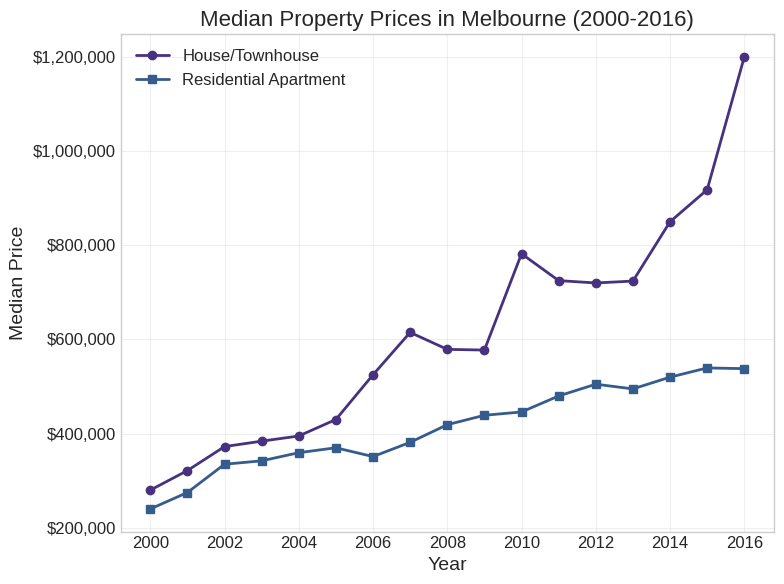

In [20]:
print("\n\n==== PRICE TRENDS ANALYSIS ====")

# Set the style for plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 12

# Group transfer year data by year and property type
price_trends = transfer_year_df.groupby(['transfer_year', 'type'])['median_price'].mean().reset_index()
price_trends_pivot = price_trends.pivot(index='transfer_year', columns='type', values='median_price')

# Calculate CAGR for each property type
def calculate_cagr(start_value, end_value, num_years):
  return (((end_value / start_value) ** (1 / num_years)) - 1) * 100

# Get the first and last years in the dataset
first_year = price_trends_pivot.index.min()
last_year = price_trends_pivot.index.max()
num_years = last_year - first_year

# Calculate CAGR for each property type
house_cagr = calculate_cagr(
    price_trends_pivot['House/Townhouse'].iloc[0],
    price_trends_pivot['House/Townhouse'].iloc[-1],
    num_years
)

apt_cagr = calculate_cagr(
    price_trends_pivot['Residential Apartment'].iloc[0],
    price_trends_pivot['Residential Apartment'].iloc[-1],
    num_years
)

print(f"Compound Annual Growth Rate (CAGR) from {first_year} to {last_year}:")
print(f"Houses/Townhouses: {house_cagr:.2f}% per year")
print(f"Residential Apartments: {apt_cagr:.2f}% per year")

# Function to format currency values
def currency_formatter(x, pos):
  return f'${x:,.0f}'

# Create a line plot for price trends
plt.figure()
plt.plot(price_trends_pivot.index, price_trends_pivot['House/Townhouse'],
         marker='o', linewidth=2, label='House/Townhouse')
plt.plot(price_trends_pivot.index, price_trends_pivot['Residential Apartment'],
         marker='s', linewidth=2, label='Residential Apartment')
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency_formatter))
plt.title('Median Property Prices in Melbourne (2000-2016)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Median Price', fontsize=14)
plt.legend(loc='upper left', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()


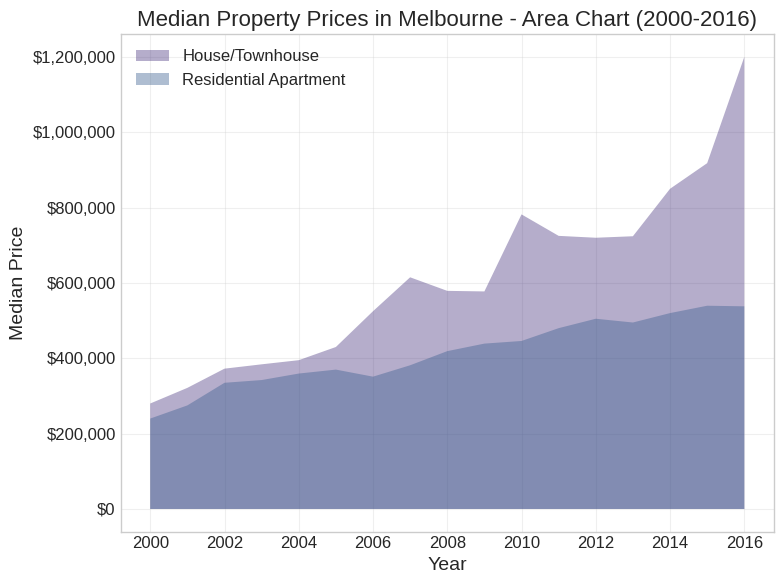

In [ ]:
# Area plot showing price trends
plt.figure(figsize=(8, 6))
plt.fill_between(price_trends_pivot.index, price_trends_pivot['House/Townhouse'], alpha=0.4, label='House/Townhouse')
plt.fill_between(price_trends_pivot.index, price_trends_pivot['Residential Apartment'], alpha=0.4, label='Residential Apartment')
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency_formatter))
plt.title('Median Property Prices in Melbourne - Area Chart (2000-2016)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Median Price', fontsize=14)
plt.legend(loc='upper left', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Looking at the "Median Property Prices in Melbourne (2000-2016)" graph, there are several key insights:

1. **Diverging Price Trajectories**:
   - Houses/townhouses have seen much stronger price growth than apartments over the 16-year period

   - In 2000, the price gap was relatively small (about $50,000-75,000)

   - By 2016, houses were worth more than double the value of apartments
   
    (approximately $1.2 million vs $540,000)

2. **Growth Patterns**:
   - Houses/townhouses: 9.52% compound annual growth rate
   - Residential apartments: 5.17% compound annual growth rate
   - This significant difference (4.35 percentage points) compounds dramatically over time

3. **Market Periods**:
   - 2000-2007: Steady growth for both property types
   - 2007-2008: Acceleration in house prices
   - 2008-2010: Brief plateau/minor correction during the global financial crisis
   - 2010: Sharp jump in house prices
   - 2011-2013: Relatively flat period for both property types
   - 2013-2016: Dramatic acceleration in house prices while apartment growth remained modest

4. **Investment Implications**:
   - Houses have significantly outperformed apartments as investments
   - The dramatic acceleration from 2013-2016 for houses suggests a potential bubble formation
   - Apartment prices show more stability but much lower growth potential

5. **Supply and Demand Factors**:
   - The modest growth in apartment prices suggests increased supply may be meeting demand
   - The sharp rise in house prices indicates limited supply relative to strong demand, particularly in recent years

This divergence between house and apartment prices is particularly significant and indicates a structural shift in the Melbourne property market that accelerated after 2013, where houses became increasingly viewed as premium assets compared to apartments.

<Figure size 1000x1000 with 0 Axes>

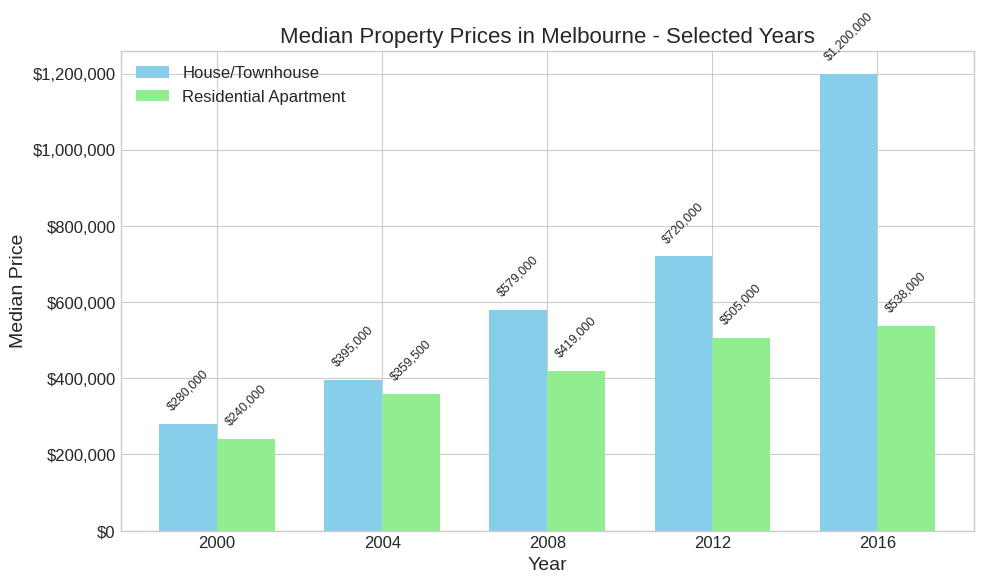

In [ ]:

# Bar plot comparing prices by year
years_to_show = [2000, 2004, 2008, 2012, 2016]  # Selected years for clarity
df_selected_years = price_trends_pivot.loc[years_to_show]

plt.figure(figsize=(10, 10))
x = np.arange(len(years_to_show))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width/2, df_selected_years['House/Townhouse'], width, label='House/Townhouse', color='skyblue')
ax.bar(x + width/2, df_selected_years['Residential Apartment'], width, label='Residential Apartment', color='lightgreen')

ax.set_xticks(x)
ax.set_xticklabels(years_to_show)
ax.yaxis.set_major_formatter(FuncFormatter(currency_formatter))
ax.set_title('Median Property Prices in Melbourne - Selected Years', fontsize=16)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Median Price', fontsize=14)
ax.legend()

# Add value labels
for i in range(len(years_to_show)):
  house_price = df_selected_years['House/Townhouse'].iloc[i]
  apt_price = df_selected_years['Residential Apartment'].iloc[i]
  ax.text(i - width/2, house_price + 30000, f'${house_price:,.0f}', ha='center', va='bottom', fontsize=9, rotation=45)
  ax.text(i + width/2, apt_price + 30000, f'${apt_price:,.0f}', ha='center', va='bottom', fontsize=9, rotation=45)

plt.tight_layout()
plt.show()

This bar chart shows the dramatic divergence in Melbourne property prices between houses and apartments from 2000 to 2016:

- In 2000, both property types had similar values (houses at $280,000, apartments at $240,000)
- By 2016, houses had skyrocketed to $1,200,000 while apartments reached only $538,000
- Houses experienced a 329% increase over the 16-year period
- Apartments grew by 124% in the same timeframe
- The gap between house and apartment prices widened significantly with each 4-year interval
- The most dramatic acceleration for houses occurred between 2012-2016, with prices jumping from $720,000 to $1,200,000 (a 67% increase in just 4 years)
- Apartment growth was more modest and consistent throughout the period

This visualization clearly illustrates how houses in Melbourne have dramatically outperformed apartments as investments, with the premium for houses growing substantially larger over time.

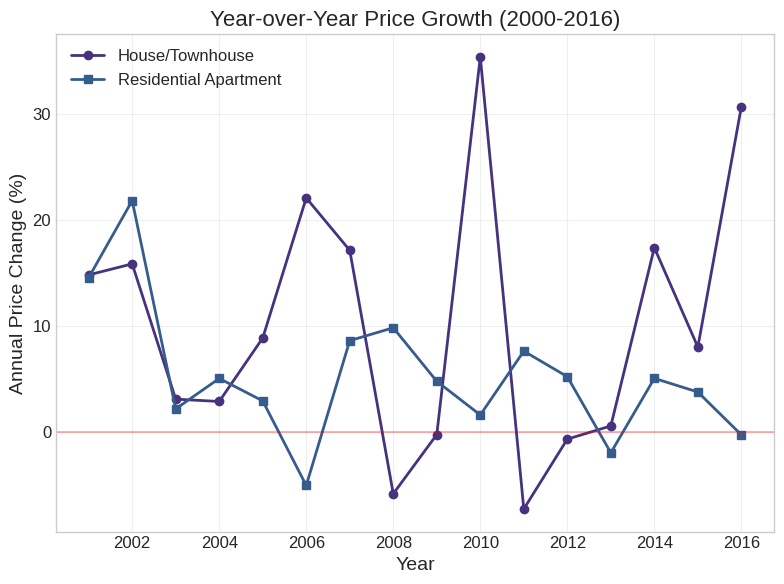

In [ ]:
#  Year-over-year price growth visualization
house_pct_change = price_trends_pivot['House/Townhouse'].pct_change() * 100
apt_pct_change = price_trends_pivot['Residential Apartment'].pct_change() * 100

plt.figure(figsize=(8, 6))
plt.plot(price_trends_pivot.index[1:], house_pct_change[1:],
         marker='o', linewidth=2, label='House/Townhouse')
plt.plot(price_trends_pivot.index[1:], apt_pct_change[1:],
         marker='s', linewidth=2, label='Residential Apartment')
plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
plt.title('Year-over-Year Price Growth (2000-2016)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Annual Price Change (%)', fontsize=14)
plt.legend(loc='upper left', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

This chart shows year-over-year price growth in Melbourne property:

- Both property types experienced volatility throughout 2000-2016
- Houses show more extreme price swings (-6% to +35%) than apartments (-5% to +22%)
- Houses had three major growth spikes: 2006 (+22%), 2010 (+35%), and 2016 (+30%)
- Apartments had their strongest growth in 2002 (+22%) but remained relatively moderate afterward
- There were brief market corrections for both property types in 2008 and 2011
- Since 2013, houses consistently outpaced apartments in growth
- By 2016, houses were surging (+30%) while apartment growth flattened to near 0%

This indicates a cyclical but increasingly divergent market, with houses showing stronger boom-bust patterns and apartments trending toward stability with diminishing returns.

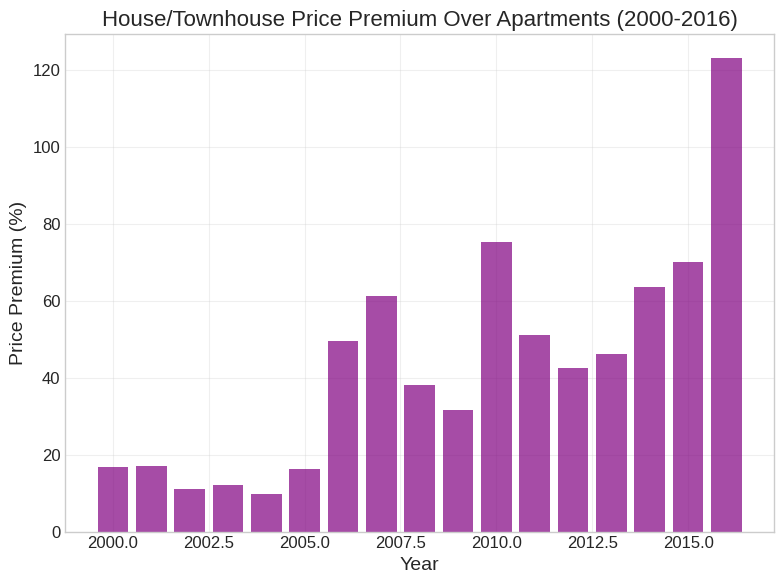

In [ ]:
#  Price disparity visualization
price_disparity = (price_trends_pivot['House/Townhouse'] / price_trends_pivot['Residential Apartment'] - 1) * 100

plt.figure(figsize=(8, 6))
plt.bar(price_trends_pivot.index, price_disparity, color='purple', alpha=0.7)
plt.title('House/Townhouse Price Premium Over Apartments (2000-2016)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Price Premium (%)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

This chart shows the house/townhouse price premium over apartments in Melbourne from 2000-2016:

- In 2000-2005, houses commanded a modest premium of 10-17% over apartments
- Around 2006, this premium increased significantly to about 50%
- The premium fluctuated between 30-75% during 2007-2014
- 2010 shows a notable spike to approximately 75% premium
- From 2014 onward, there's a dramatic acceleration
- By 2016, houses were valued at more than 120% higher than apartments

This visualization demonstrates a fundamental shift in the Melbourne property market, with the value gap between houses and apartments widening dramatically, especially in the final years of the period. This suggests a growing preference for houses over apartments and potentially insufficient house supply compared to apartment supply in the market.

### Overall Conclusion of Price Trend Analysis

## Geographic Price Comparison

The data reveals significant geographic variation in Melbourne's property market:

For houses:
- South Yarra commands the highest premium at 142.5% above the median ($2,135,000), establishing it as Melbourne's most prestigious housing market
- East Melbourne and Parkville follow with substantial premiums (120.3% and 100.0% respectively)
- There's a significant drop-off after the top three areas, with Carlton at a 26.1% premium
- West Melbourne (Residential) barely exceeds the median with just a 2.2% premium

For apartments:
- Premium distribution is much more modest, with East Melbourne leading at only 26.2% above median
- The top five apartment areas all fall within a relatively narrow premium range (7.8%-26.2%)
- Interestingly, Docklands ranks second for apartments (+14.8%) despite not appearing in the top five for houses
- South Yarra, while commanding the highest house premium, ranks fifth for apartments (+7.8%)

Key insights:
1. Premium location value is much more pronounced for houses than apartments
2. The most expensive housing areas command dramatically higher premiums than the most expensive apartment areas
3. Some areas (like South Yarra) show strong preference for houses over apartments
4. Other areas (like Docklands) are relatively stronger in the apartment market

This suggests different geographic submarkets within Melbourne have developed distinct property type characteristics, likely influenced by factors such as available land, planning regulations, and demographic preferences.



==== GEOGRAPHIC PRICE COMPARISON ====

Price Premium by Area for Houses/Townhouses (top 5):
South Yarra: $2,135,000 (+142.5%)
East Melbourne: $1,940,000 (+120.3%)
Parkville: $1,761,250 (+100.0%)
Carlton: $1,110,000 (+26.1%)
West Melbourne (Residential): $900,000 (+2.2%)

Price Premium by Area for Residential Apartments (top 5):
East Melbourne: $650,000 (+26.2%)
Docklands: $591,000 (+14.8%)
Melbourne (Remainder): $582,500 (+13.1%)
Southbank: $565,000 (+9.7%)
South Yarra: $555,000 (+7.8%)


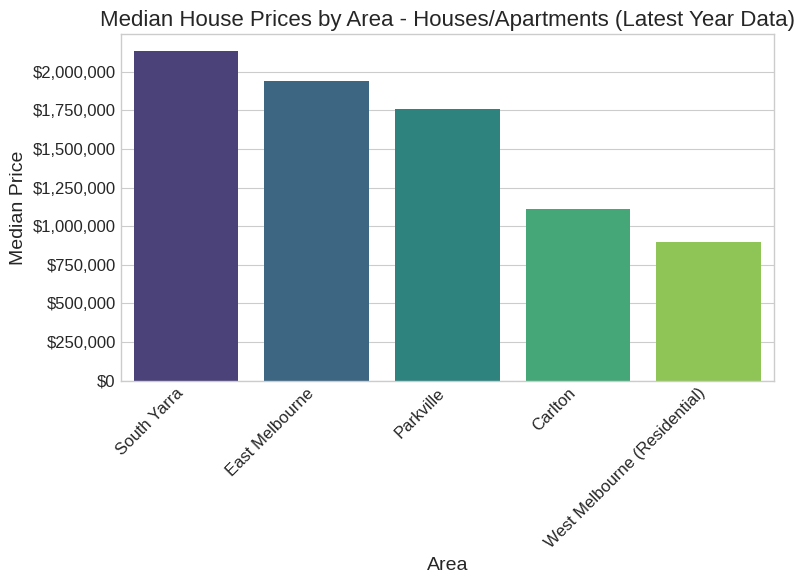

In [25]:
print("\n\n==== GEOGRAPHIC PRICE COMPARISON ====")

# Filter for the most recent year with data for each area and property type
def get_latest_year_data(df):
  # Group by small_area and type
  groups = df.groupby(['small_area', 'type'])
  latest_data = []
  for (area, prop_type), group in groups:
    if pd.notna(area):  # Skip entries with NaN area
      # Get the row with the maximum year
      latest_row = group.loc[group['sale_year'].idxmax()]
      if pd.notna(latest_row['median_price']):
        latest_data.append(latest_row)

  return pd.DataFrame(latest_data)

latest_area_data = get_latest_year_data(small_area_df)

# Calculate overall median by property type
overall_medians = latest_area_data.groupby('type')['median_price'].median()

# Calculate price premium for each area
latest_area_data['price_premium'] = latest_area_data.apply(
    lambda x: ((x['median_price'] / overall_medians[x['type']]) - 1) * 100
    if pd.notna(x['small_area']) else np.nan,
    axis=1
)

# Get top areas by price premium for each property type
houses = latest_area_data[latest_area_data['type'] == 'House/Townhouse'].sort_values(
    'price_premium', ascending=False
)
apartments = latest_area_data[latest_area_data['type'] == 'Residential Apartment'].sort_values(
    'price_premium', ascending=False
)

print("\nPrice Premium by Area for Houses/Townhouses (top 5):")
for _, row in houses.head(5).iterrows():
  premium = row['price_premium']
  premium_text = f"+{premium:.1f}%" if premium >= 0 else f"{premium:.1f}%"
  print(f"{row['small_area']}: ${row['median_price']:,.0f} ({premium_text})")

print("\nPrice Premium by Area for Residential Apartments (top 5):")
for _, row in apartments.head(5).iterrows():
  premium = row['price_premium']
  premium_text = f"+{premium:.1f}%" if premium >= 0 else f"{premium:.1f}%"
  print(f"{row['small_area']}: ${row['median_price']:,.0f} ({premium_text})")

# Create a bar plot for geographic comparison (Houses)
plt.figure()
top_house_areas = houses.head(5)
# Fix the FutureWarning by adding hue parameter and setting legend=False
sns.barplot(x='small_area', y='median_price', hue='small_area', data=top_house_areas,
            palette='viridis', legend=False)
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency_formatter))
plt.title('Median House Prices by Area - Houses/Apartments (Latest Year Data)', fontsize=16)
plt.xlabel('Area', fontsize=14)
plt.ylabel('Median Price', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

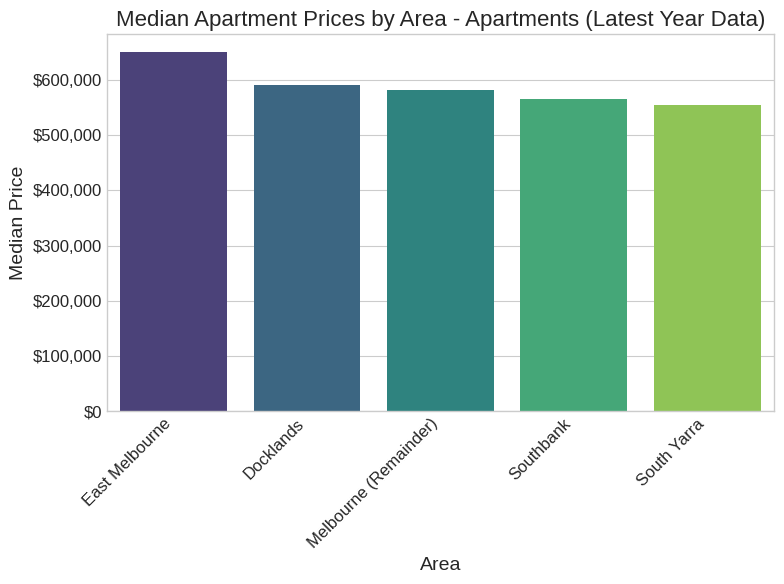

In [26]:
# Create a bar plot for geographic comparison (Apartments)
plt.figure()
top_apt_areas = apartments.head(5)
# Fix the FutureWarning by adding hue parameter and setting legend=False
sns.barplot(x='small_area', y='median_price', hue='small_area', data=top_apt_areas,
            palette='viridis', legend=False)
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency_formatter))
plt.title('Median Apartment Prices by Area - Apartments (Latest Year Data)', fontsize=16)
plt.xlabel('Area', fontsize=14)
plt.ylabel('Median Price', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


This chart comparing house and apartment prices across Melbourne areas in 2016 reveals several key insights:

1. **Dramatic price disparity in premium areas**: South Yarra shows the most

  extreme difference, with houses ($2,135,000) priced nearly 4 times higher than
  
  apartments ($555,000).

2. **Three-tier housing market**:
   - Premium tier: South Yarra, East Melbourne, and Parkville ($1.76-2.14 million)

   - Mid-tier: Carlton and West Melbourne ($900,000-1.11 million)

   - Lower tier: Other areas ($487,300-861,000)

3. **Relatively flat apartment market**: Apartment prices show much less variation ($430,000-650,000) across all areas, suggesting more homogeneous valuation.

4. **Price inversion in some areas**: In Docklands, Melbourne CBD, and Southbank, apartments are actually more expensive than houses, indicating these areas are primarily apartment-focused markets.

5. **Location premium varies by property type**: East Melbourne commands the highest apartment prices ($650,000) but ranks second for houses, while South Yarra leads in house prices but ranks fifth for apartments.

6. **Central business areas specialize**: The CBD, Docklands, and Southbank show similar pricing patterns with relatively expensive apartments and less expensive houses, reflecting their urban, high-density development focus.

This visualization clearly illustrates how Melbourne's property market has developed distinct geographic segments with dramatically different value propositions for houses versus apartments.

<Figure size 1400x800 with 0 Axes>

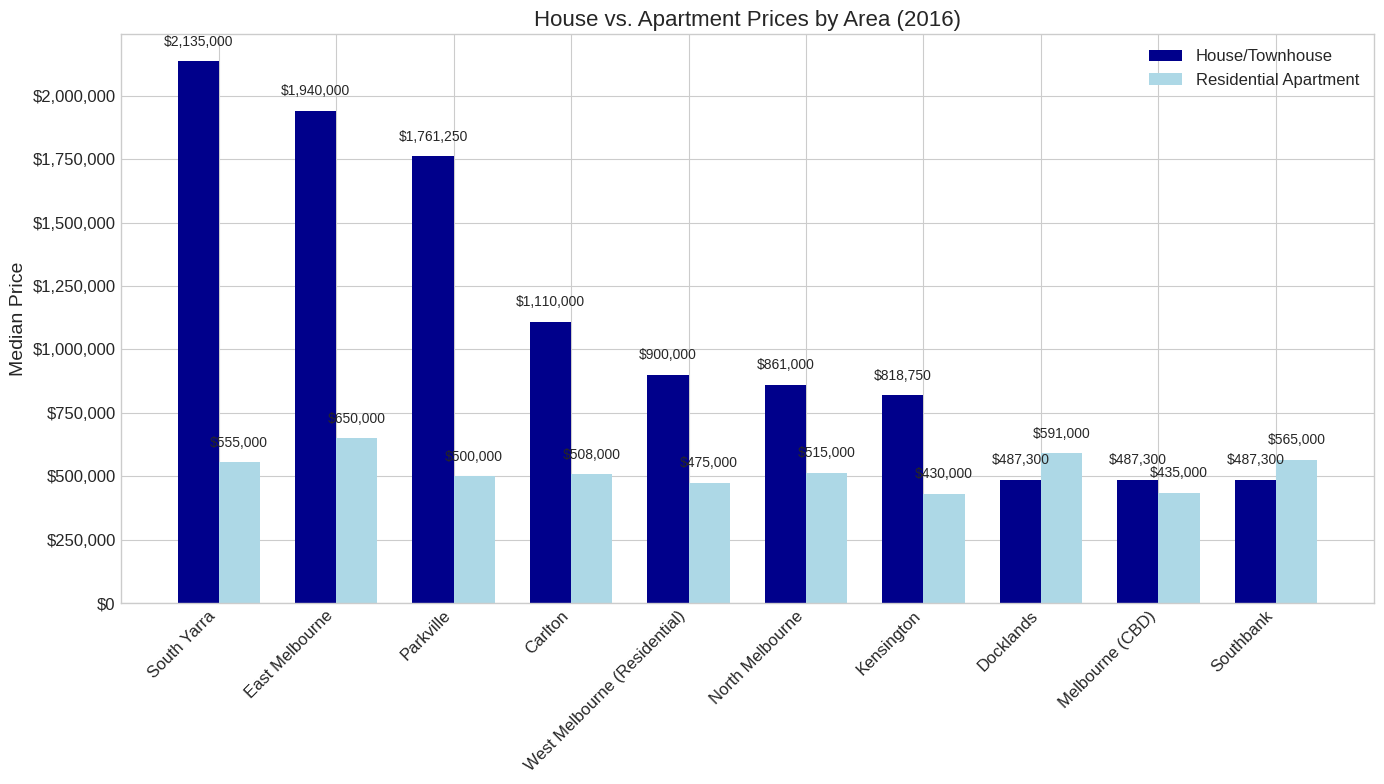

In [ ]:
# Create a combined visualization comparing houses and apartments
# Combine the data
combined_data = pd.concat([houses, apartments])

# Create a grouped bar chart to compare houses and apartments by area
common_areas = set(houses['small_area']).intersection(set(apartments['small_area']))
combined_common = combined_data[combined_data['small_area'].isin(common_areas)]

# Pivot the data for easier plotting
pivot_data = combined_common.pivot(index='small_area', columns='type', values='median_price').reset_index()
pivot_data = pivot_data.sort_values(by='House/Townhouse', ascending=False)

# Create the plot
plt.figure(figsize=(14, 8))
x = np.arange(len(pivot_data))
width = 0.35

fig, ax = plt.subplots(figsize=(14, 8))
house_bars = ax.bar(x - width/2, pivot_data['House/Townhouse'], width, label='House/Townhouse', color='darkblue')
apt_bars = ax.bar(x + width/2, pivot_data['Residential Apartment'], width, label='Residential Apartment', color='lightblue')

ax.set_ylabel('Median Price', fontsize=14)
ax.set_title('House vs. Apartment Prices by Area (2016)', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(pivot_data['small_area'], rotation=45, ha='right')
ax.legend()
ax.yaxis.set_major_formatter(FuncFormatter(currency_formatter))

# Add value labels
for bar in house_bars:
  height = bar.get_height()
  ax.text(bar.get_x() + bar.get_width()/2., height + 50000,
          f'${height:,.0f}', ha='center', va='bottom', fontsize=10)

for bar in apt_bars:
  height = bar.get_height()
  ax.text(bar.get_x() + bar.get_width()/2., height + 50000,
          f'${height:,.0f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()



This "Price Premium by Area and Property Type" chart reveals dramatic differences in how Melbourne areas compare to median property values:

For houses:
- South Yarra (+142.5%), East Melbourne (+120.3%), and Parkville (+100.0%) command extraordinary premiums
- The CBD areas (Docklands, Melbourne CBD, Southbank) all show identical substantial discounts (-44.7%)

For apartments:
- Premium range is much narrower, with East Melbourne (+26.2%) and Carlton (+26.1%) leading
- Kensington (-16.5%) shows the largest apartment discount
- Even premium areas show more modest apartment premiums compared to houses

This visualization highlights extreme market segmentation: certain areas (particularly South Yarra) are extraordinarily valued for houses but show modest apartment premiums, while CBD locations significantly underperform for houses but maintain competitive apartment values. This reflects dramatically different supply-demand dynamics between property types across Melbourne's neighborhoods.

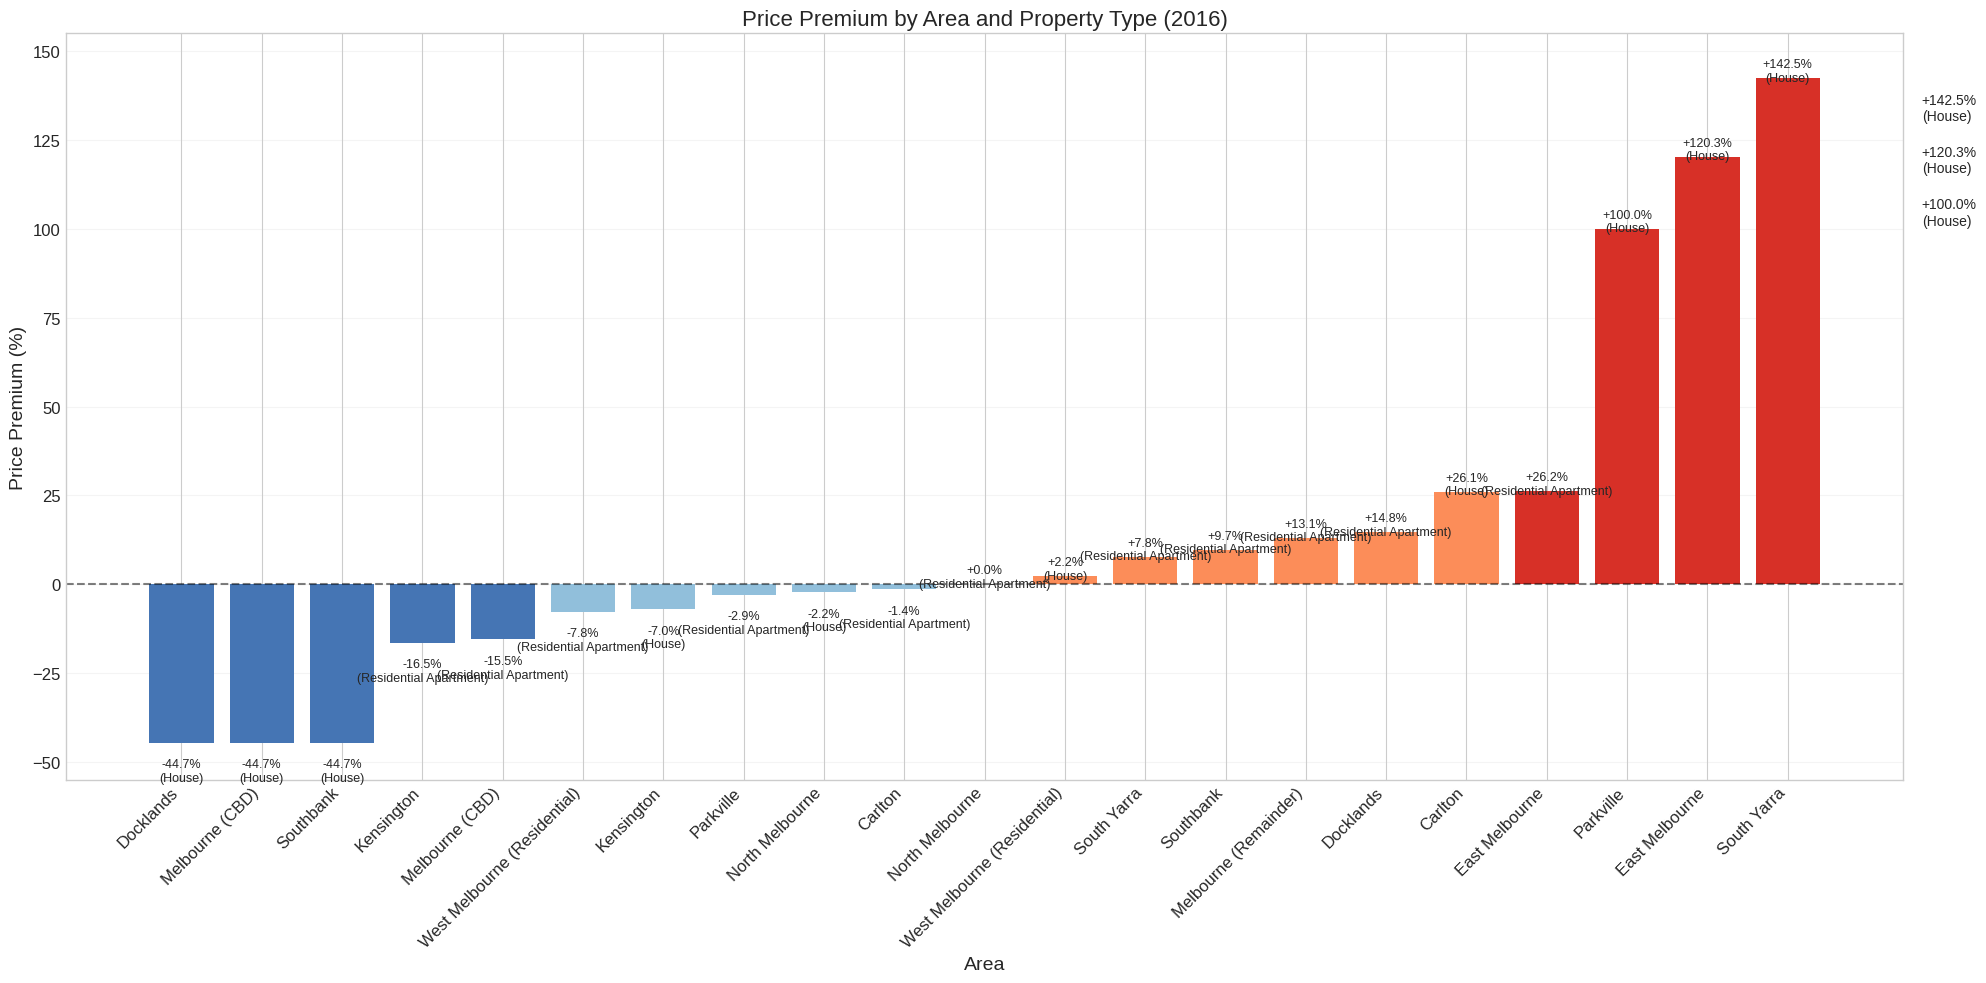

In [28]:

# Sort by price premium for the initial plot
sorted_data = combined_data.sort_values('price_premium')

# Create figure with appropriate size
plt.figure(figsize=(20, 10))

# Create color mapping based on price premium values
def get_color(premium, property_type):
  if property_type == "House/Townhouse":
      if premium < -20:
        return '#4575b4'  # Dark blue for very negative
      elif premium < 0:
        return '#91bfdb'  # Light blue for negative
      elif premium < 50:
        return '#fc8d59'  # Light red for moderate positive
      else:
        return '#d73027'  # Dark red for high positive
  else:  # Apartments
      if premium < -10:
        return '#4575b4'  # Dark blue for very negative
      elif premium < 0:
        return '#91bfdb'  # Light blue for negative
      elif premium < 15:
        return '#fc8d59'  # Light red for moderate positive
      else:
        return '#d73027'  # Dark red for high positive

# Get colors for each bar
colors = [get_color(row.price_premium, row.type) for row in sorted_data.itertuples()]

# Create the bars
bars = plt.bar(range(len(sorted_data)), sorted_data['price_premium'], color=colors)

# Add zero line
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)

# Customize axes
plt.xlabel('Area', fontsize=14)
plt.ylabel('Price Premium (%)', fontsize=14)
plt.title('Price Premium by Area and Property Type (2016)', fontsize=16)

# Set ticks and labels
plt.xticks(range(len(sorted_data)), sorted_data['small_area'], rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Set y-axis limits with some padding
plt.ylim(-55, 155)

# Add data labels with property type
for i, row in enumerate(sorted_data.itertuples()):
  y_pos = row.price_premium + (2 if row.price_premium >= 0 else -8)
  plt.text(i, y_pos,
           f"{row.price_premium:+.1f}%\n({row.type.split('/')[0]})",
           ha='center', va='center', fontsize=9)

# Add annotations for extreme values on the right side of the plot
# Top 3 highest values
top_values = combined_data.nlargest(3, 'price_premium')
for i, row in enumerate(top_values.itertuples()):
  plt.annotate(
      f"{row.price_premium:+.1f}%\n({row.type.split('/')[0]})",
      xy=(1.01, 0.9 - i*0.07),
      xycoords='axes fraction',
      fontsize=10,
      va='center'
    )

# Add horizontal grid lines
plt.grid(axis='y', linestyle='-', alpha=0.2)

# Ensure layout is tight
plt.tight_layout()

plt.show()

This heatmap presents the same data as the previous bar chart, but in a format that more effectively highlights the relationship patterns between areas and property types.

The heatmap clearly shows several important patterns:

1. **Strong inverse relationships** in some areas:
   - Docklands and Southbank show significant house discounts (-44.7%) but apartment premiums (+14.8% and +9.7%)
   - South Yarra shows an extreme house premium (+142.5%) but only a modest apartment premium (+7.8%)

2. **Aligned market performance** in other areas:
   - East Melbourne performs well in both categories (+120.3% houses, +26.2% apartments)
   - Kensington underperforms in both categories (-7.0% houses, -16.5% apartments)
   - Melbourne CBD is discounted in both categories (-44.7% houses, -15.5% apartments)

3. **Premium distribution**:
   - House premiums show much more dramatic variation (from -44.7% to +142.5%)
   - Apartment premiums are more compressed (from -16.5% to +26.2%)

4. **Market specialization**:
   - The top section shows traditional prestigious areas (South Yarra, East Melbourne)
   - The bottom section shows newer, apartment-focused developments (Docklands, Southbank)

This visualization makes the market segmentation more immediately apparent than the bar chart and lets you easily see which areas have similar patterns across property types.

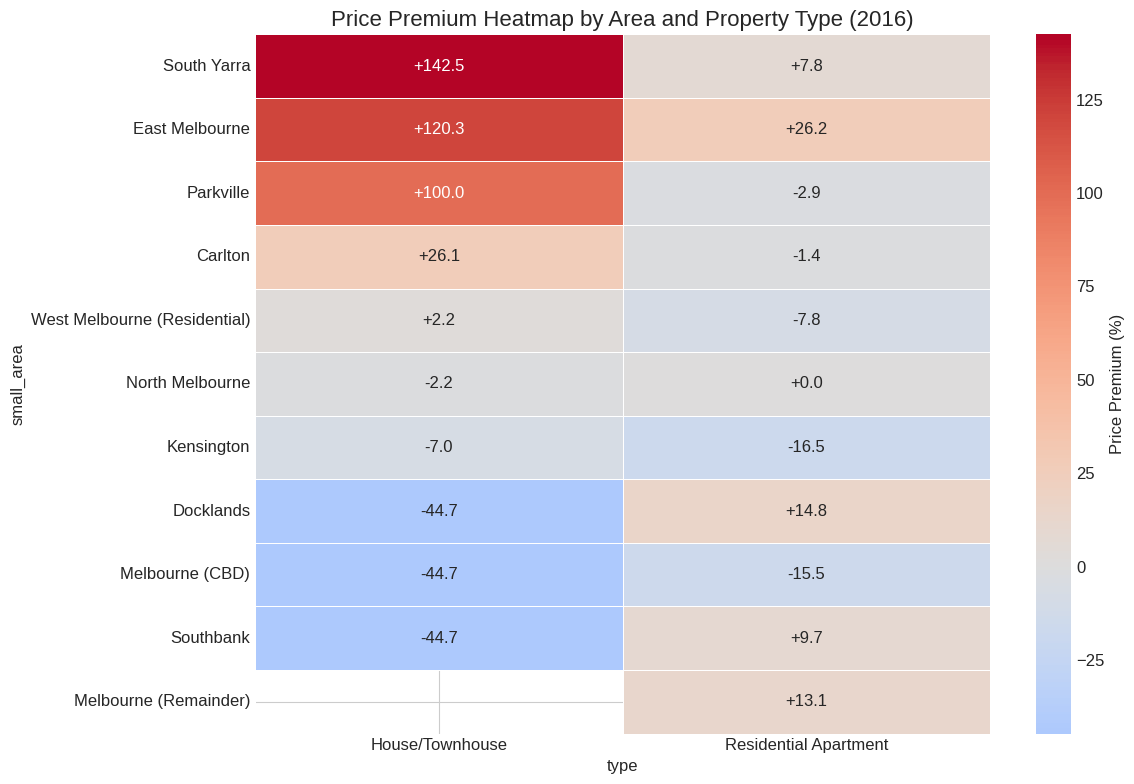

In [ ]:
# Create a heatmap showing price premium by area and property type
pivot_premium = combined_data.pivot(index='small_area', columns='type', values='price_premium')
pivot_premium = pivot_premium.sort_values(by='House/Townhouse', ascending=False)

plt.figure(figsize=(12, 8))
ax = sns.heatmap(pivot_premium, annot=True, fmt="+.1f", cmap='coolwarm', center=0,
                linewidths=.5, cbar_kws={'label': 'Price Premium (%)'})
plt.title('Price Premium Heatmap by Area and Property Type (2016)', fontsize=16)
plt.tight_layout()
plt.show()


Looking at the geographic dimension of Melbourne's property market:

The data reveals distinct geographic submarkets with dramatically different characteristics:

1. **Premium inner-eastern/southern belt**: South Yarra, East Melbourne, and Parkville form an ultra-premium housing zone with enormous price premiums (100-142.5%), suggesting strong land value components and limited supply.

2. **CBD apartment ecosystem**: Docklands, Southbank, and Melbourne CBD show an inverse pattern - housing discounts (-44.7%) but apartment premiums, reflecting their high-density urban development focus.

3. **Middle-tier transition areas**: Carlton and West Melbourne show moderate house premiums but apartment discounts, suggesting areas in transition between traditional housing and higher-density development.

4. **Price inversion zones**: In Docklands and Southbank, apartments actually command higher absolute prices than houses, a rare market phenomenon indicating specialized urban development.

5. **North-western value areas**: Kensington and North Melbourne show relative affordability in both categories, offering value opportunities closer to the city center.

This geographic segmentation reflects Melbourne's urban development history, planning policies, and lifestyle preferences, creating distinct investment and living propositions across different areas of the city.